# 1. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# 2. Data importing

In [86]:
data = pd.read_csv('../../raw_data/full_master_df_for_review.csv')

In [87]:
data.head()

player_name  fee_cleaned  sofifa_id               long_name  age  \
0       aaron collins        0.069     225509           Aaron Collins   17   
1          aaron hunt        2.700     158138              Aaron Hunt   27   
2        aaron lennon        5.400     152747            Aaron Lennon   27   
3       abdoul camara        1.530     193953  Abdoul Razzagui Camara   24   
4  abdoulaye doucoure        9.540     208135      Abdoulaye Doucouré   21   

   height_cm  weight_kg nationality          club_name  \
0        178         57       Wales     Newport County   
1        183         73     Germany      VfL Wolfsburg   
2        165         63     England  Tottenham Hotspur   
3        178         71      Guinea         Angers SCO   
4        182         69      France   Stade Rennais FC   

              league_name  ...  lb  lcb  cb  rcb  rb fifa year  national_team  \
0      English League Two  ...  32   31  31   31  32      2015              0   
1    German 1. Bundesliga  ...  59   53  53   53  59      2015              0   
2  English Premier League  ...  50   41  41   41  50      2015              0   
3          French Ligue 2  ...  49   45  45   45  49      2015              0   
4          French Ligue 1  ...  65   66  66   66  65      2015              0   

   seasons_with_club  on_loan remaining_seasons_on_contract  
0                  1        0                           0.0  
1                  1        0                           2.0  
2                 10        0                           1.0  
3                  1        0                           2.0  
4                  4        0                           2.0  

[5 rows x 104 columns]

In [88]:
list(data.columns)

['player_name',
 'fee_cleaned',
 'sofifa_id',
 'long_name',
 'age',
 'height_cm',
 'weight_kg',
 'nationality',
 'club_name',
 'league_name',
 'league_rank',
 'overall',
 'potential',
 'wage_eur',
 'player_positions',
 'preferred_foot',
 'international_reputation',
 'weak_foot',
 'skill_moves',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'team_position',
 'team_jersey_number',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning',
 'player_traits',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_st

# 3. Exploratory Data Analysis

## 3.1. Who are the top 10 best paid players who have been transfered in the last 6 years?

In [83]:
top10_wage_index = data['wage_eur'].sort_values(ascending=False).head(10).index

In [84]:
top10_wage_index

Int64Index([95, 94, 3592, 93, 725, 92, 4012, 975, 1434, 4899], dtype='int64')

In [69]:
data.iloc[1738]

fee_cleaned                         105.3
age                                    32
height_cm                             185
weight_kg                              80
nationality                      Portugal
                                   ...   
fifa year                            2018
national_team                           1
seasons_with_club                       9
on_loan                                 0
remaining_seasons_on_contract         3.0
Name: 1738, Length: 101, dtype: object

In [70]:
for idx, val in enumerate(top10_wage_index):
    print(f"#{idx} Player wage:{data.iloc[val]['wage_eur']} @ index {val}")

#0 Player wage:575000 @ index 1738
#1 Player wage:450000 @ index 3584
#2 Player wage:350000 @ index 2603
#3 Player wage:325000 @ index 2307
#4 Player wage:250000 @ index 2873
#5 Player wage:230000 @ index 3483
#6 Player wage:225000 @ index 2635
#7 Player wage:225000 @ index 1299
#8 Player wage:220000 @ index 3353
#9 Player wage:220000 @ index 3160


In [73]:
data.nunique()

fee_cleaned                      486
age                               20
height_cm                         40
weight_kg                         44
nationality                      106
                                ... 
fifa year                          7
national_team                      2
seasons_with_club                 18
on_loan                            2
remaining_seasons_on_contract      9
Length: 101, dtype: int64

In [74]:
data.shape

(3916, 101)

## 3.2. Player Transfer value over its overall ability

<AxesSubplot:xlabel='overall', ylabel='fee_cleaned'>

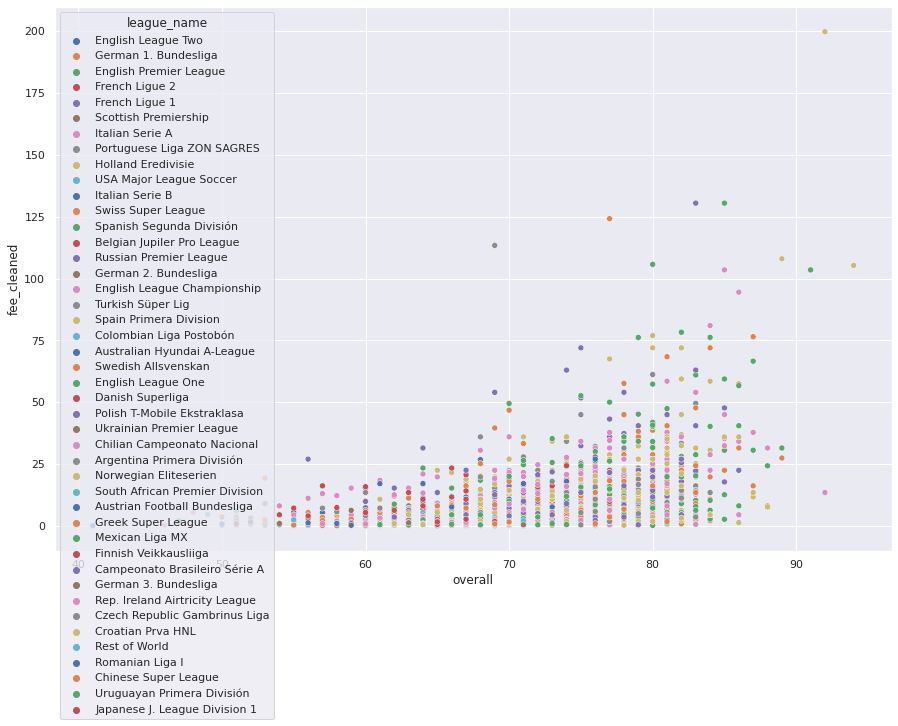

In [89]:
sns.set_style('darkgrid')
sns.set(rc={"figure.figsize":(15, 10)}) #width=3, #height=4
sns.scatterplot(data=data, x='overall', y='fee_cleaned', palette="deep", hue='league_name')

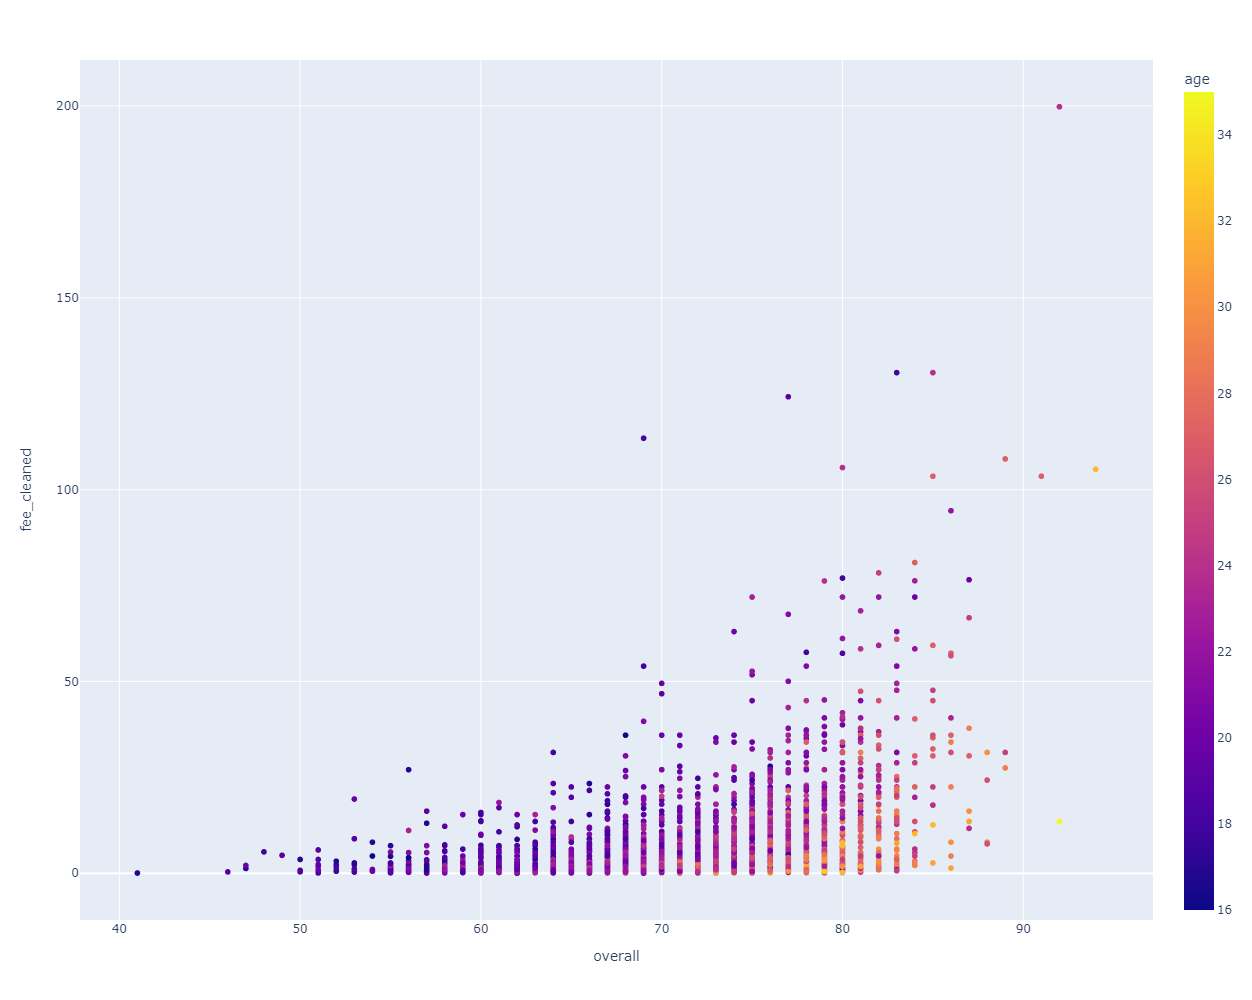

In [99]:
fig = px.scatter(data_frame=data, x="overall", y="fee_cleaned",color='age', hover_data=['league_name'], width=1000, height=1000)
fig.show()

1. A player's overall ability doesnt seem to carry much influence over the transfer fee.

2. Some examples of "cheap" but "good overall" players include:
    * ivan rakitic
    * steve mandanda (goalkeeper)
    * daniel sturridge
    * pau lopez (goalkeeper)
    
3. Altough **young players** seem to have **higher transfer fees**, this could lead to an early affirmation that a player's transfer fee is somewhat dictated by their **potential**. Look at cases such as:
    * Joao Felix (19)
    * Dembele (20)
    * jack grealish (25)
    * neymar (25, sold for a whooping £199.8m)
    * paul pogba (23)
    * victor osimhen (21)

## 3.3. Number of incoming players by league

<AxesSubplot:xlabel='league_name_x', ylabel='Count'>

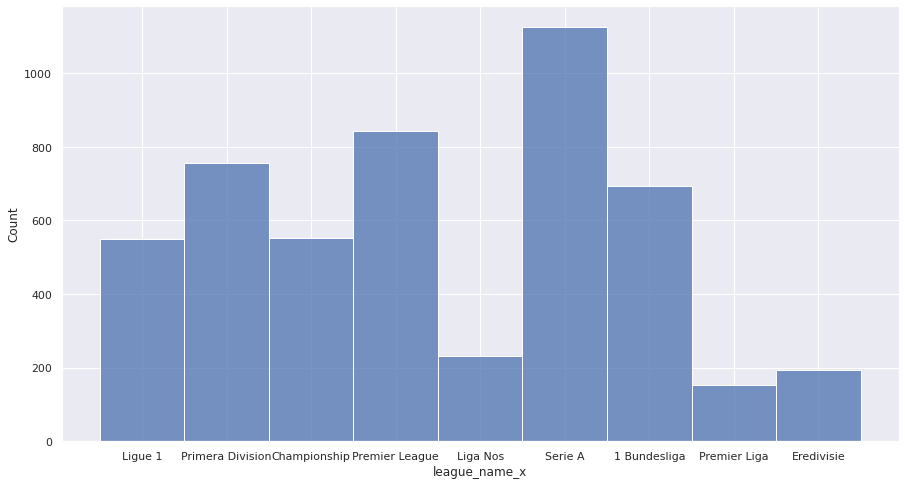

In [18]:
sns.set(rc={"figure.figsize":(15, 8)}) #width=3, #height=4
sns.histplot(data, x='league_name_x')

Since 2015 it looks like the italian SERIE A was the league who bought the most players

## 3.4. Leagues where players come from

In [19]:
data.league_name_y.unique()

array(['English Premier League', 'Spain Primera Division',
       'French Ligue 1', 'Argentina Primera División',
       'Austrian Football Bundesliga', 'French Ligue 2',
       'German 2. Bundesliga', 'Portuguese Liga ZON SAGRES',
       'Holland Eredivisie', 'Turkish Süper Lig', 'Norwegian Eliteserien',
       'Italian Serie A', 'German 1. Bundesliga',
       'Colombian Liga Postobón', 'Swiss Super League', nan,
       'Polish T-Mobile Ekstraklasa', 'Danish Superliga',
       'Russian Premier League', 'Mexican Liga MX', 'English League Two',
       'English League Championship', 'Spanish Segunda División',
       'Italian Serie B', 'Greek Super League',
       'Belgian Jupiler Pro League', 'Swedish Allsvenskan',
       'Chilian Campeonato Nacional', 'Australian Hyundai A-League',
       'Chinese Super League', 'German 3. Bundesliga',
       'Scottish Premiership', 'Japanese J. League Division 1',
       'English League One', 'Czech Republic Gambrinus Liga',
       'Rep. Ireland Airtr

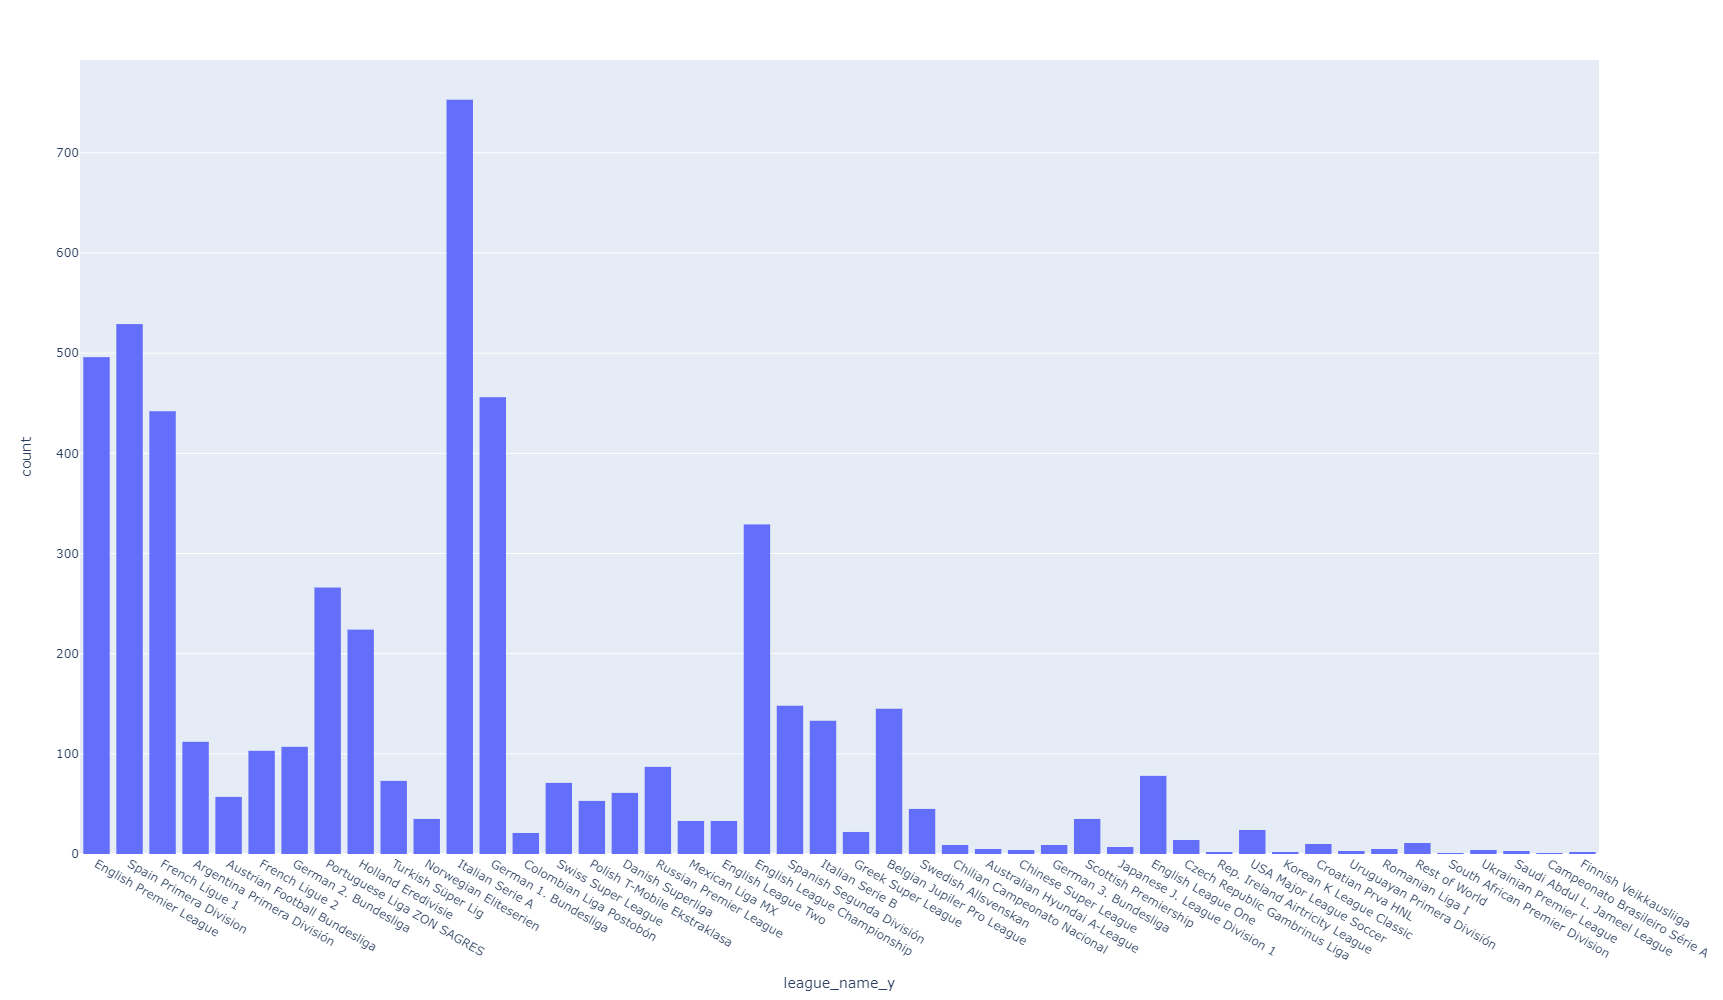

In [20]:
fig = px.histogram(data, x="league_name_y", width=1000, height=1000)
fig.show()

## 3.5. Transfer fee distribution per buying league

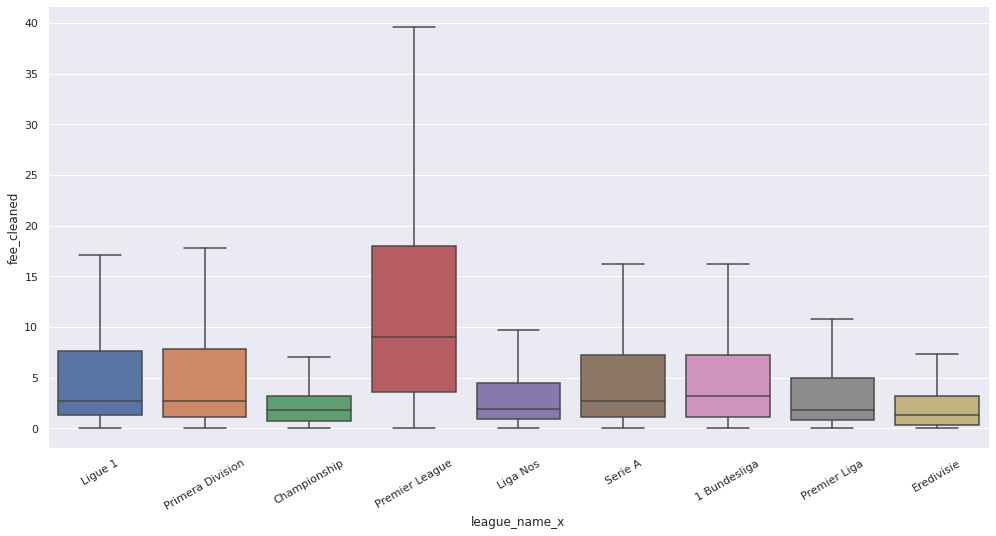

In [21]:
ax = sns.catplot(data=data, x='league_name_x',y='fee_cleaned', kind='box', showfliers=False, height=7,aspect=2)
ax.set_xticklabels(rotation = 30)

## 3.6. Distribution per player position

### 3.6.1. transfer fee distribution per player position

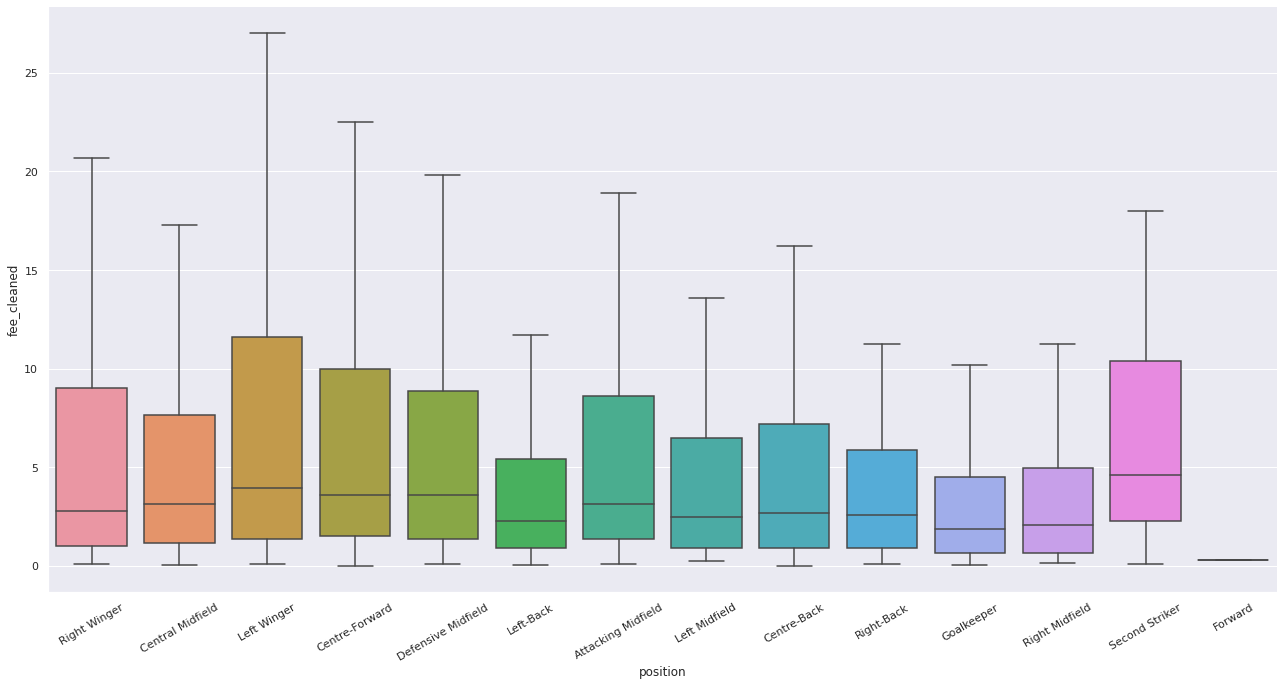

In [22]:
ax = sns.catplot(data=data, x='position',y='fee_cleaned', kind='box', showfliers=False, height=9,aspect=2)
ax.set_xticklabels(rotation = 30)

 * a second striker seems to have a higher median
 * a player whose position is the second striker is usually traded at a higher value

### 3.6.1. wage distribution per player position

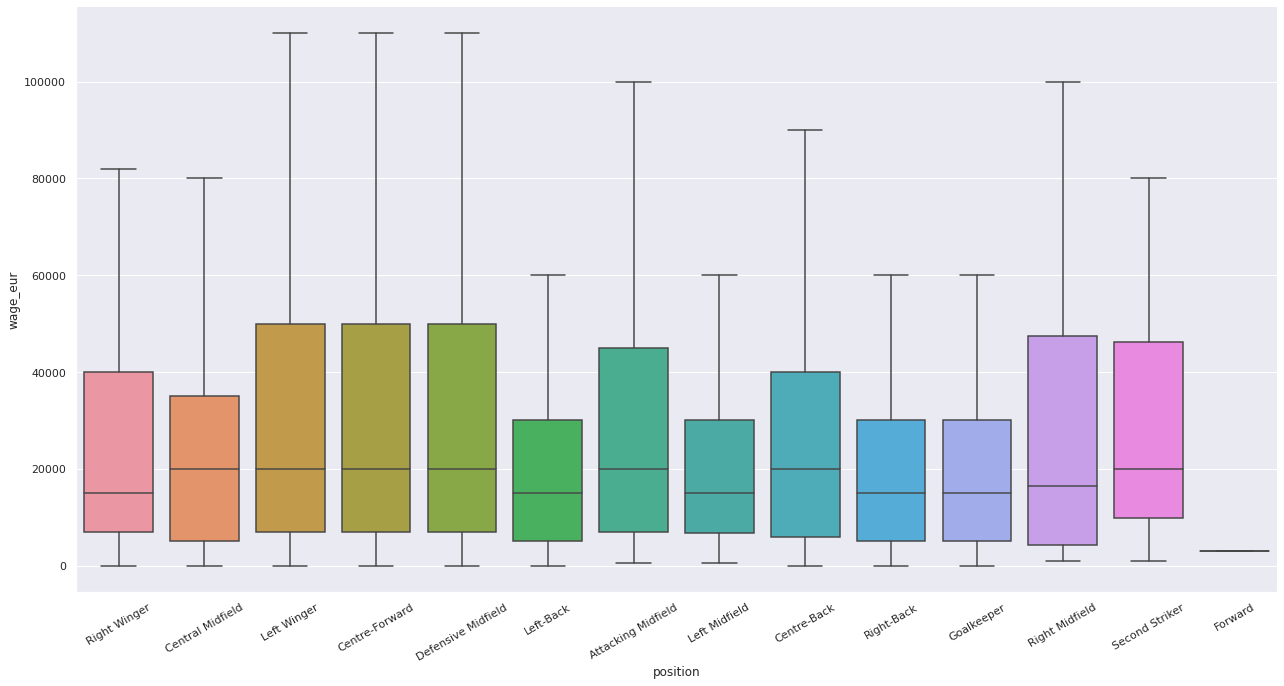

In [23]:
ax = sns.catplot(data=data, x='position',y='wage_eur', kind='box', showfliers=False, height=9,aspect=2)
ax.set_xticklabels(rotation = 30)

## 3.7. Player age Vs. transfer fee

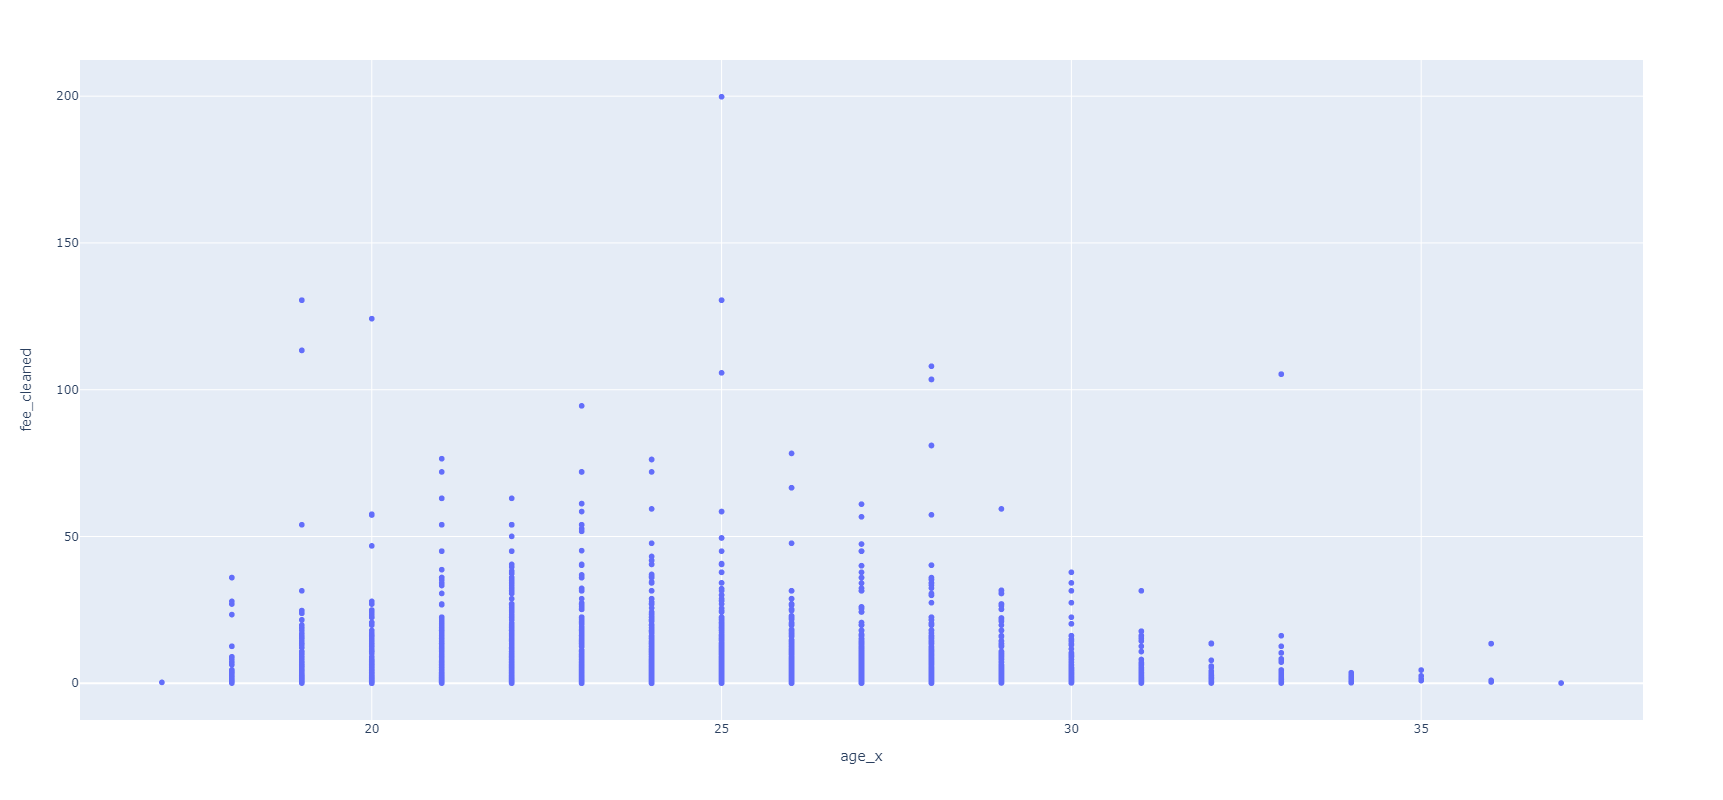

In [24]:
fig = px.scatter(data, x="age_x", y="fee_cleaned", hover_data=['player_name', 'league_name_x', 'fifa year'], width=1000, height=800)
fig.show()

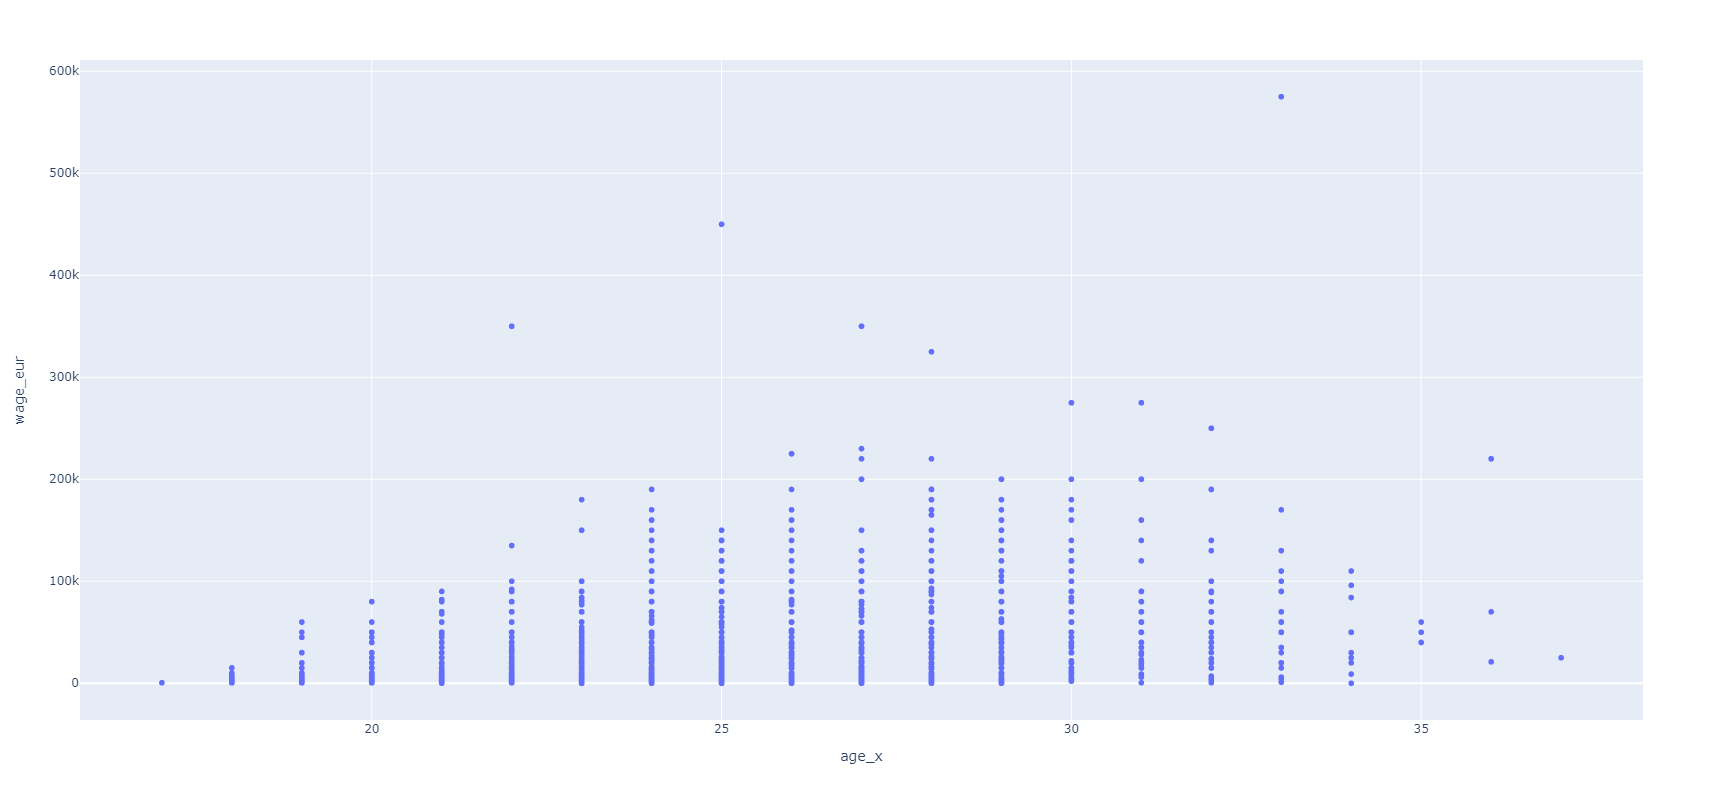

In [25]:
fig = px.scatter(data, x="age_x", y="wage_eur", hover_data=['player_name', 'league_name_x', 'fifa year'], width=1000, height=800)
fig.show()

## 3.8 Player age distribution

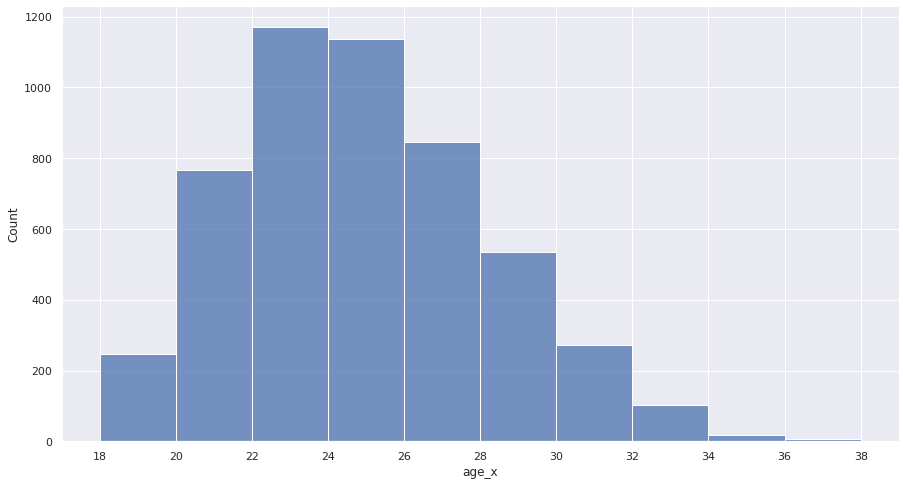

In [26]:
ax = sns.histplot(data, x='age_x', bins=[18,20,22,24,26,28,30,32,34,36,38])
ax.set_xticks([18,20,22,24,26,28,30,32,34,36,38]);

In [47]:
data[data.age_x > 36][['club_name_x', 'player_name','age_x', 'position', 'club_involved_name', 'fee', 'transfer_movement', 'fifa year']]

club_name_x      player_name  age_x    position club_involved_name  \
1531  SV Werder Bremen  gerhard tremmel   37.0  Goalkeeper            Swansea   

                  fee transfer_movement  fifa year  
1531  Loan fee:£90Th.                in       2015

## 3.9. Checking feature importance on the fee_transfer

---

'year','season','fifa year','sofifa_id','player_url','short_name','long_name','dob','height_cm','weight_kg'

<AxesSubplot:xlabel='year', ylabel='count'>

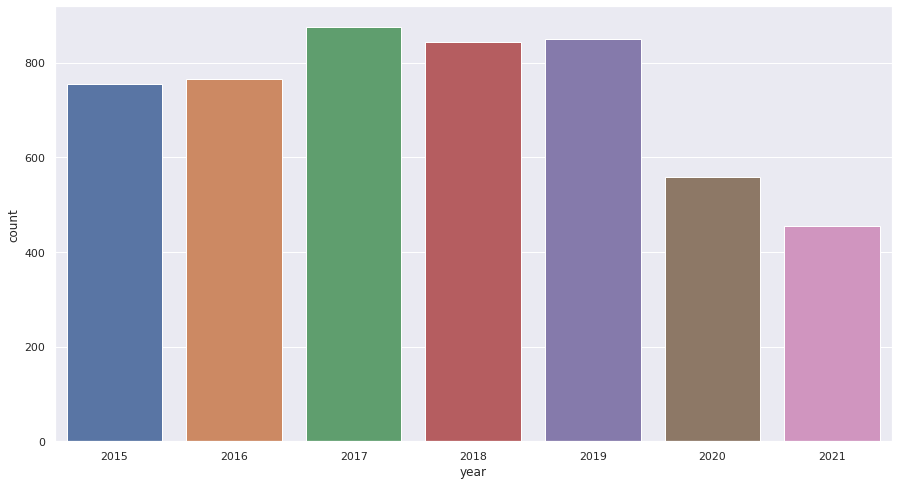

In [135]:
sns.countplot(data=data, x='year')

 * 2017 was a good year for tansfers having reached 875 transfers that year
 * 2020 and 2021 (COVID19) the transfer market fell drastically 🧫🔬, for the year 2021 we only have summer transfer
 * indirectly the `year` might have made the players market value plummet due to the fact that there where no matches for several months
 * as years go by a player over the age of 25 will have its `fee_cleaned` value decrease
 * There could be an influence due to the market value inflation over the last 6 years, meaning that a player in the exact same conditions in 2015 was worth "less" than the same player in 2021

In [51]:
data[data.year == 2020]['transfer_period'].unique()

array(['Summer', 'Winter'], dtype=object)

In [140]:
data[data.year == 2019]['sofifa_id'].count()

849

In [139]:
data[data.year == 2021]['sofifa_id'].count()

454

In [52]:
data[data.year == 2020]['sofifa_id'].count()

558

### 3.9.1 `height` effect on players transfer fee

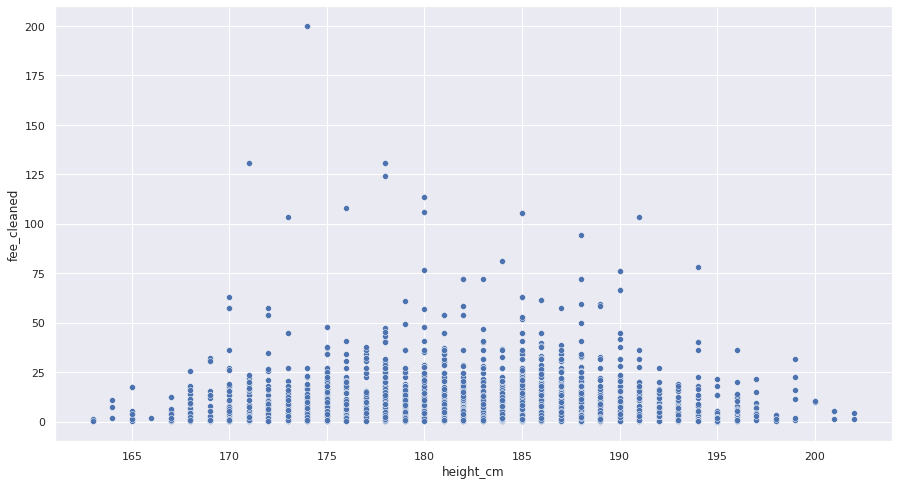

In [53]:
sns.scatterplot(data=data, x='height_cm', y='fee_cleaned');

* Player on both extremes [0-170] and [195-210] are commonly traded around the same window value (anywhere between 0 and £25m)
* it just seems natural that players in the midrange [170 - 195] are the one with the highest amount of trades, simply due to the fact that are more players in this height range 
* it would not be surprising that the highest value for `transfer_fee` would sit in this interval.
* it is therefore less likely that we can draw any conclusions about the transfer fee using the players `height_cm`

### 3.9.2 `weight` effect on players transfer fee

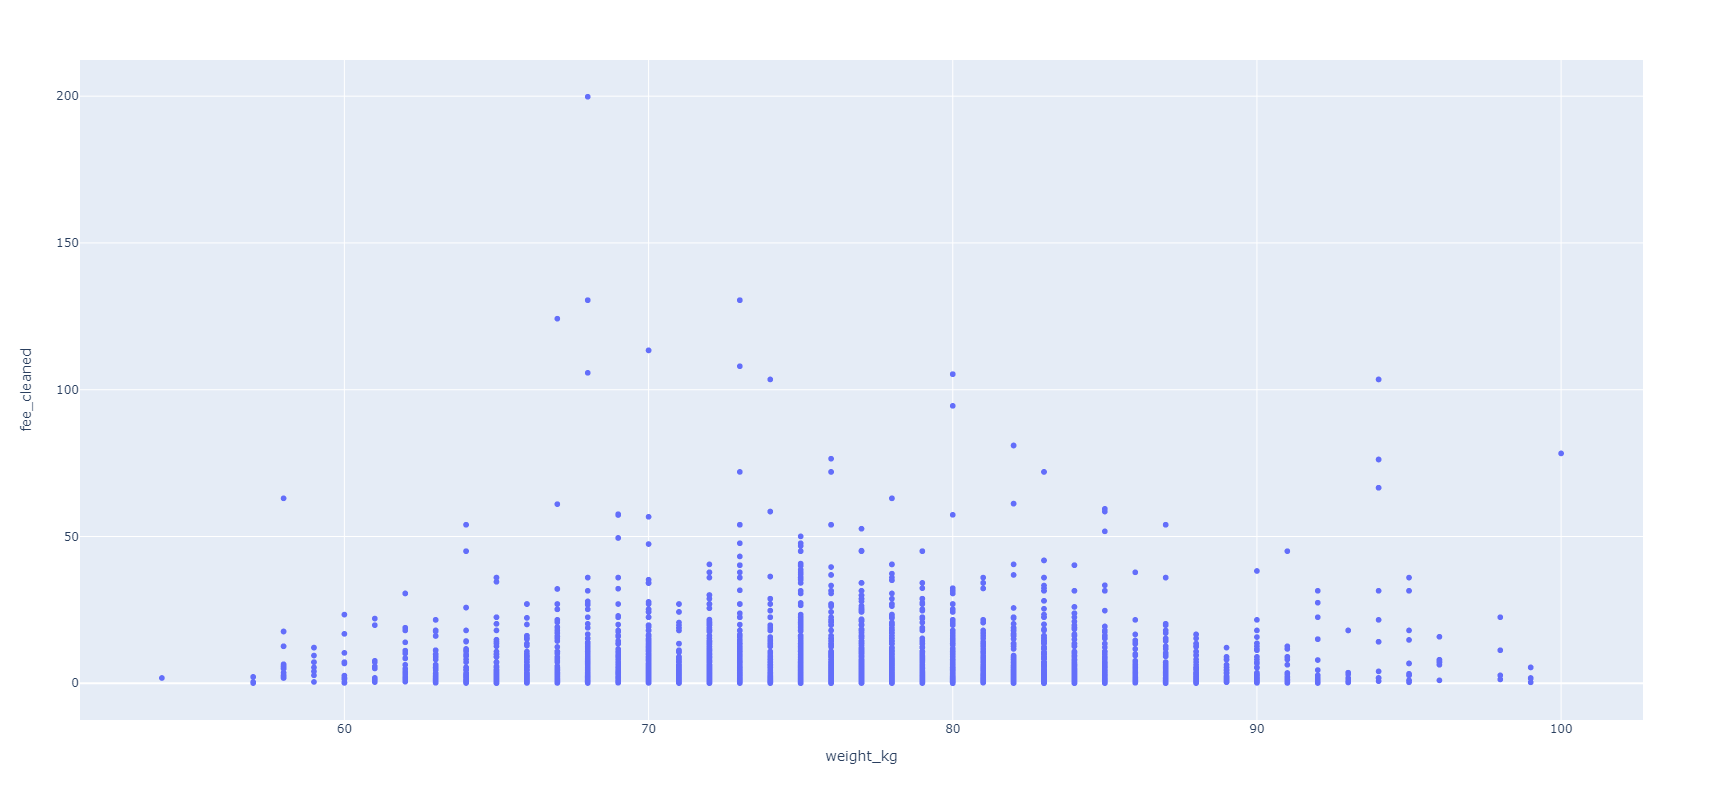

In [149]:
fig = px.scatter(data, x="weight_kg",y='fee_cleaned', hover_data=['player_name', 'league_name_x', 'fifa year'], width=1000, height=800)
fig.show()

 * There is an ox that was sold for £78.3m pounds! interesting fact but not relevant 😮

---

'nationality','club_name_y','league_name_y','league_rank','overall','potential','value_eur','wage_eur','player_positions','preferred_foot','international_reputation'

### 3.9.3 `potential` effect on players transfer fee

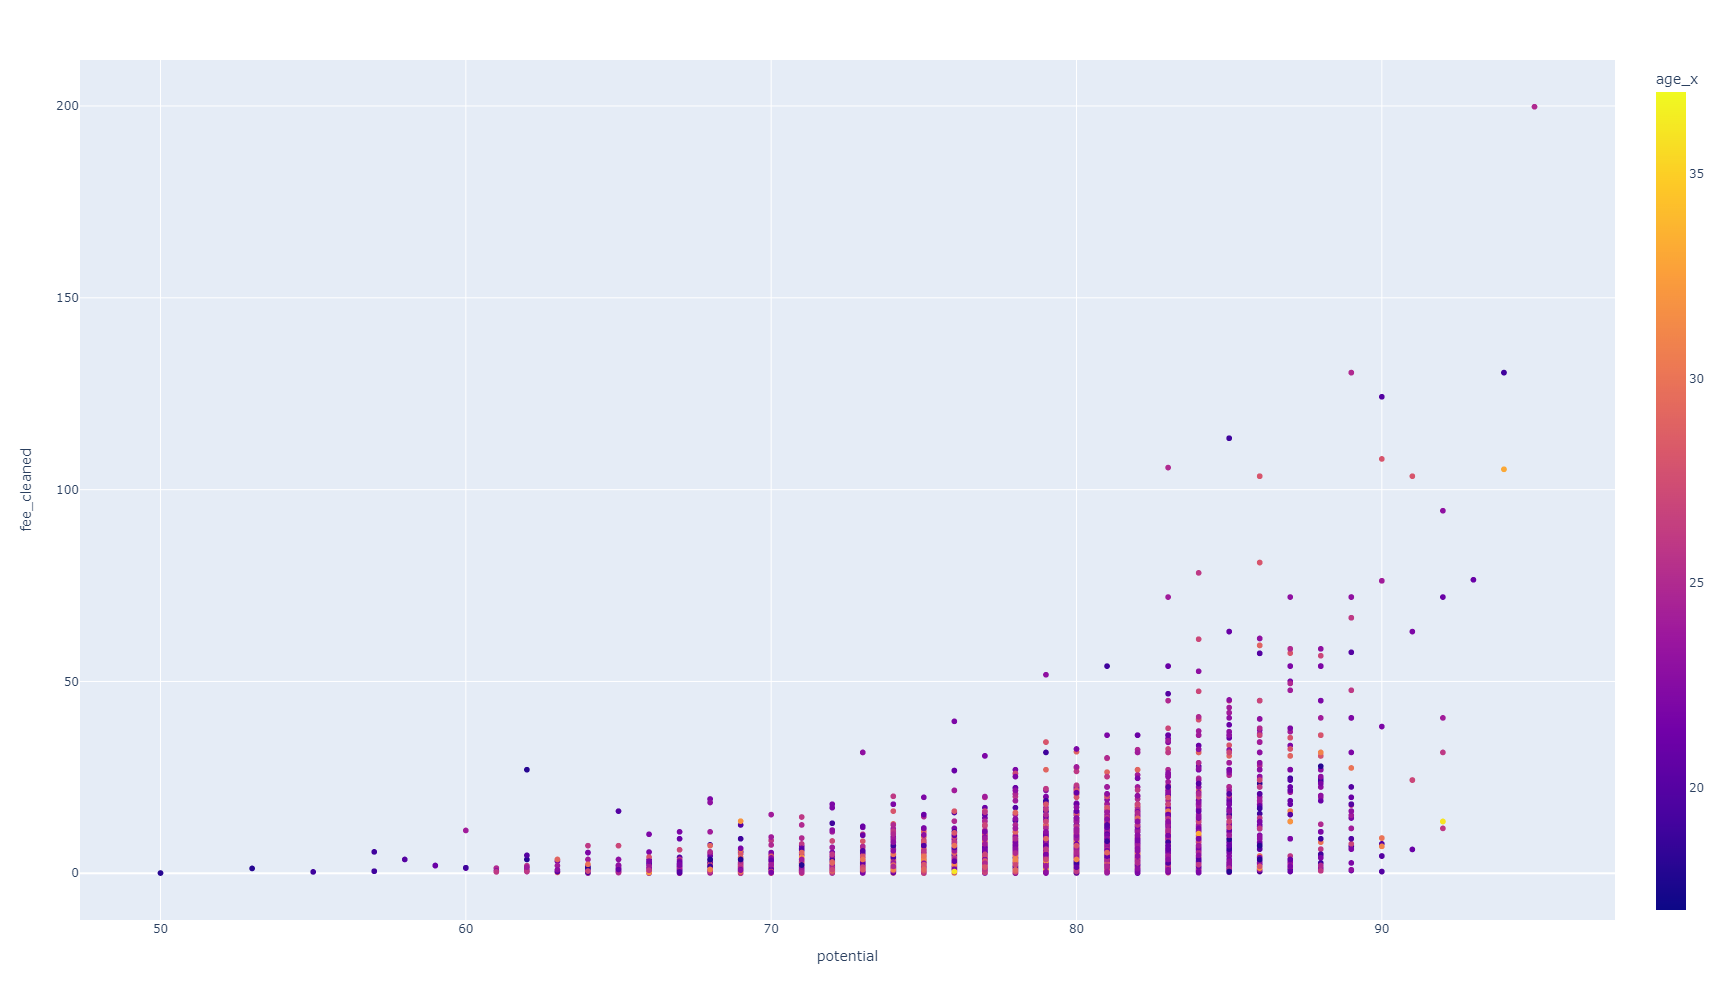

In [54]:
fig = px.scatter(data, x="potential", y="fee_cleaned",color='age_x', hover_data=['player_name', 'league_name_x', 'fifa year', 'age_x'], width=1000, height=1000)
fig.show()

* the potential alone is not a great indicator for a players `fee_cleaned` value
* it seems that there is an exponential increase in `fee_cleaned` with the increase in player `potential` 
* players in the **lower right** quadrant of the graph (high potential - low transfer fee) are usually very young (20-25)
* OR we could argue that there seems to be a slight linear relationship between player `potential` and `fee_cleaned` with the outliers being those players that are sold at higher values 

### 3.9.4 `wage_eur` effect on players transfer fee

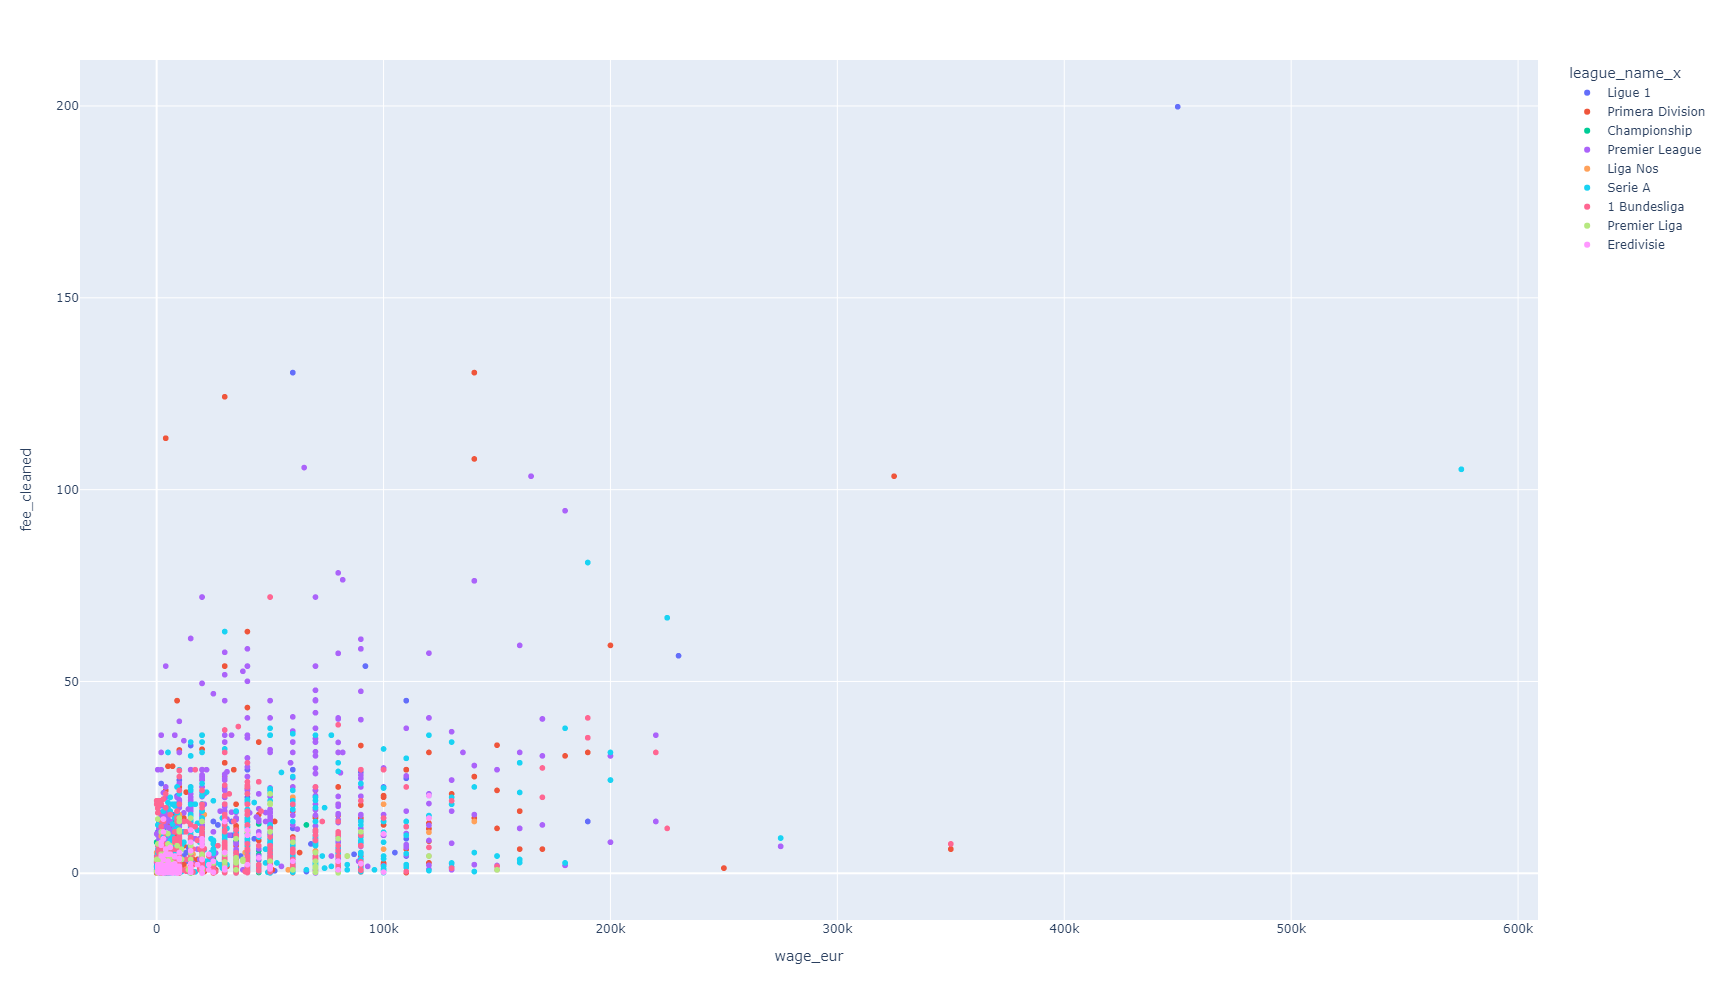

In [165]:
fig = px.scatter(data, x="wage_eur", y="fee_cleaned",color='league_name_x', hover_data=['player_name', 'league_name_x', 'fifa year', 'age_x'], width=1000, height=1000)
fig.show()

a couple of points to pay attention to when dealing with the `wage_eur`:
 * ronaldo has a wage of €575k (is this per year? month? week?)
 * joao felix has a wage of €4000 (is this per year? month? week? day?)
 * there seems to be a discrepancy between the units used for describing player salaries

### 3.9.5 `international_reputation`

In [168]:
data.international_reputation.value_counts()

1    3876
2     927
3     262
4      26
5       7
Name: international_reputation, dtype: int64

<AxesSubplot:xlabel='international_reputation', ylabel='count'>

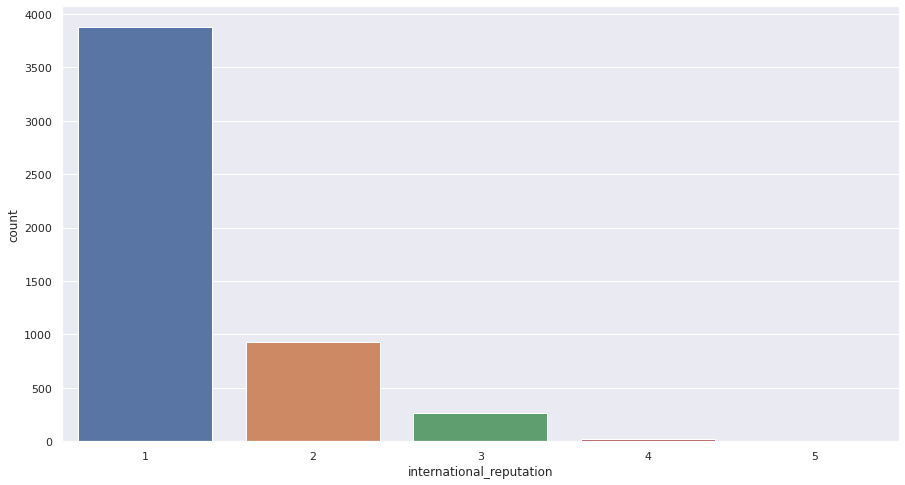

In [169]:
sns.countplot(x='international_reputation', data=data)

#### curiosity: who are the players with international reputation of 5?

In [171]:
data[data.international_reputation == 5]

club_name_x        player_name  age_x        position  \
641   Paris Saint-Germain             neymar   25.0     Left Winger   
967           Juventus FC  cristiano ronaldo   33.0     Left Winger   
968     Manchester United  cristiano ronaldo   36.0  Centre-Forward   
1304           Granada CF        luis suarez   22.0  Centre-Forward   
3456          Juventus FC  cristiano ronaldo   33.0     Left Winger   
4763           Granada CF        luis suarez   22.0  Centre-Forward   
5042    Manchester United  cristiano ronaldo   36.0  Centre-Forward   

     club_involved_name       fee transfer_movement transfer_period  \
641        FC Barcelona  £199.80m                in          Summer   
967         Real Madrid  £105.30m                in          Summer   
968            Juventus   £13.50m                in          Summer   
1304            Watford    £6.30m                in          Summer   
3456        Real Madrid  £105.30m                in          Summer   
4763            Watford    £6.30m                in          Summer   
5042           Juventus   £13.50m                in          Summer   

      fee_cleaned     league_name_x  ...   lwb   ldm   cdm   rdm   rwb    lb  \
641         199.8           Ligue 1  ...  63+4  58+4  58+4  58+4  63+4  58+4   
967         105.3           Serie A  ...  66+4  62+4  62+4  62+4  66+4  61+4   
968          13.5    Premier League  ...  65+3  61+3  61+3  61+3  65+3  61+3   
1304          6.3  Primera Division  ...  67+3  68+3  68+3  68+3  67+3  64+3   
3456        105.3           Serie A  ...  66+4  62+4  62+4  62+4  66+4  61+4   
4763          6.3  Primera Division  ...  67+3  68+3  68+3  68+3  67+3  64+3   
5042         13.5    Premier League  ...  65+3  61+3  61+3  61+3  65+3  61+3   

       lcb    cb   rcb    rb  
641   46+4  46+4  46+4  58+4  
967   53+4  53+4  53+4  61+4  
968   54+3  54+3  54+3  61+3  
1304  63+3  63+3  63+3  64+3  
3456  53+4  53+4  53+4  61+4  
4763  63+3  63+3  63+3  64+3  
5042  54+3  54+3  54+3  61+3  

[7 rows x 118 columns]

In [ ]:
fig = px.scatter(data, x="potential", y="fee_cleaned",color='age_x', hover_data=['player_name', 'league_name_x', 'fifa year', 'age_x'], width=1000, height=1000)
fig.show()

In [55]:
data['potential_delta'] = data['potential'] - data['overall']

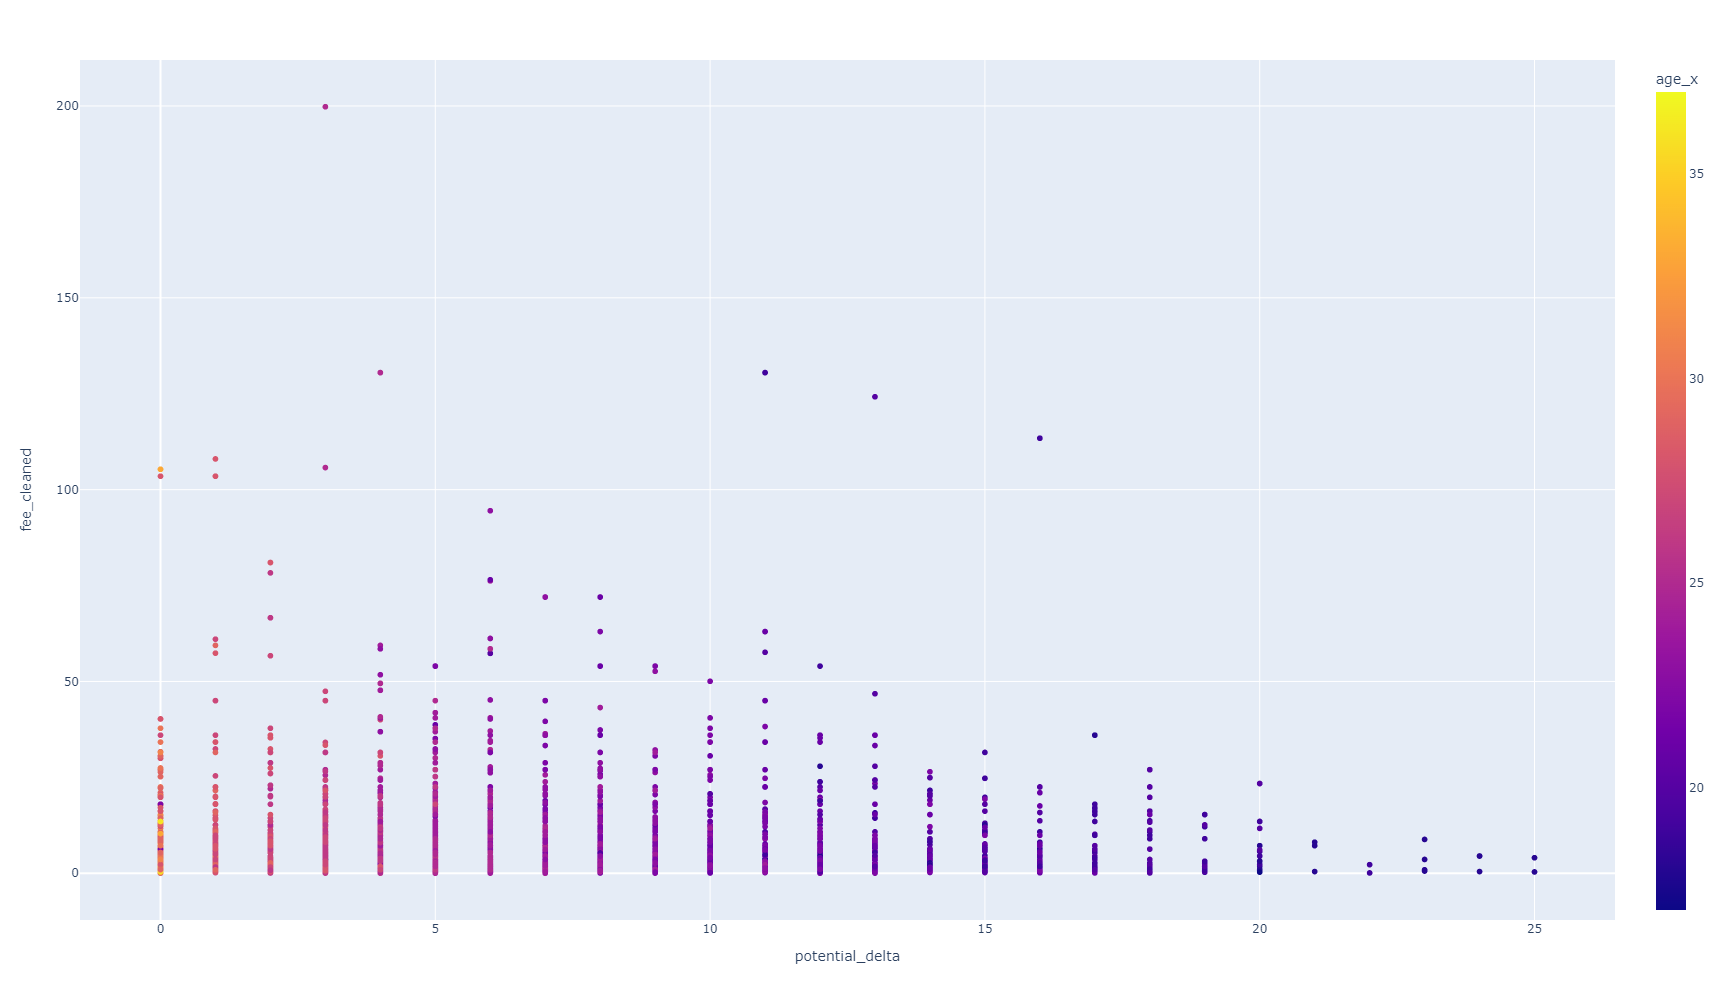

In [57]:
fig = px.scatter(data, x="potential_delta", y="fee_cleaned",color='age_x', hover_data=['player_name', 'league_name_x', 'fifa year', 'age_x'], width=1000, height=1000)
fig.show()

 * clubs will tend to pay higher `fee_cleaned` values for player that have already shown "their value"